In [1]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D
import random
import matplotlib.pyplot as plt
plt.style.use('seaborn')

C:\Users\alekhya\AppData\Local\Temp\ipykernel_9832\3524837943.py:6: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


In [2]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
 
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)
input_shape = (28, 28, 1)

In [3]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

x_train /= 255
x_test /= 255

In [ ]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

x_train /= 255
x_test /= 255

In [6]:
model = Sequential()
#convolution layer
model.add(Conv2D(28, kernel_size=(3,3), input_shape=input_shape))
#downsample
model.add(MaxPooling2D(pool_size=(2, 2)))
#flattens the input
model.add(Flatten())
#
model.add(Dense(128, activation=tf.nn.relu))
#
model.add(Dropout(0.2))
#
model.add(Dense(10,activation=tf.nn.softmax))

In [7]:
# compile and fit the model
# using ADAM optimizer
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(x=x_train,y=y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 29s 15ms/step - loss: 0.2133 - accuracy: 0.9355
Epoch 2/10
1875/1875 [==============================] - 27s 14ms/step - loss: 0.0862 - accuracy: 0.9735
Epoch 3/10
1875/1875 [==============================] - 28s 15ms/step - loss: 0.0601 - accuracy: 0.9815
Epoch 4/10
1875/1875 [==============================] - 28s 15ms/step - loss: 0.0459 - accuracy: 0.9855
Epoch 5/10
1875/1875 [==============================] - 27s 14ms/step - loss: 0.0368 - accuracy: 0.9884
Epoch 6/10
1875/1875 [==============================] - 27s 14ms/step - loss: 0.0290 - accuracy: 0.9903
Epoch 7/10
1875/1875 [==============================] - 27s 14ms/step - loss: 0.0256 - accuracy: 0.9916
Epoch 8/10
1875/1875 [==============================] - 1315s 702ms/step - loss: 0.0236 - accuracy: 0.9922
Epoch 9/10
1875/1875 [==============================] - 28s 15ms/step - loss: 0.0209 - accuracy: 0.9933
Epoch 10/10
1875/1875 [==============================] - 27s 

1/1 [==============================] - 0s 26ms/step


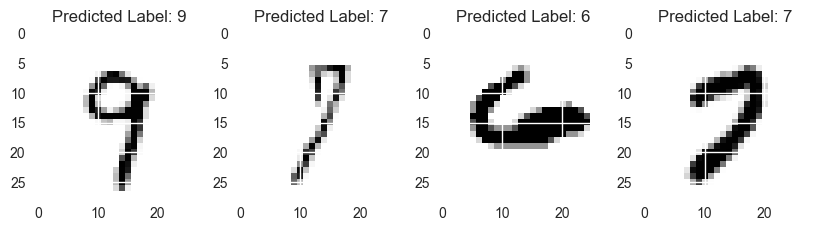

In [8]:
plt.figure(figsize=(10,10))
for i in range(4):
    plt.subplot(4,4,i+1)
    index = random.randint(1000, 5000)
    predict = x_test[index].reshape(28,28)
    pred = model.predict(x_test[index].reshape(1, 28, 28, 1))
    plt.imshow(x_test[index].reshape(28, 28),cmap='Greys')
    plt.title("Predicted Label: "+str(pred.argmax()))

1/1 [==============================] - 0s 35ms/step


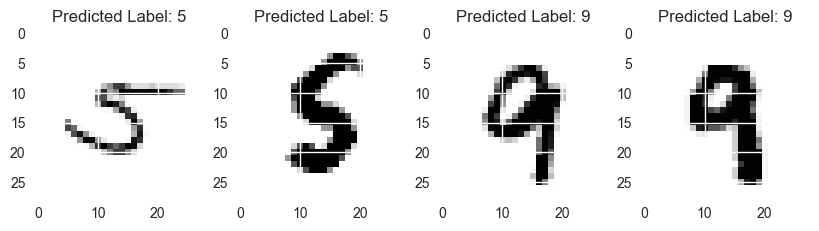

In [9]:
plt.figure(figsize=(10,10))
for i in range(4):
    plt.subplot(4,4,i+1)
    index = random.randint(1000, 5000)
    predict = x_test[index].reshape(28,28)
    pred = model.predict(x_test[index].reshape(1, 28, 28, 1))
    plt.imshow(x_test[index].reshape(28, 28),cmap='Greys')
    plt.title("Predicted Label: "+str(pred.argmax()))

In [10]:
# save the model
model.save('model/')

INFO:tensorflow:Assets written to: model/assets


INFO:tensorflow:Assets written to: model/assets
